## Weather Dataset:

In [1]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates
from datetime import datetime
import statistics
import math

### Reading Weather data 2020
Provided by: <br>
Arpa Piemonte <br>
Dipartimento Rischi naturali e ambientali <br>
https://aria.ambiente.piemonte.it/

In [2]:
def draw_small_multiple(dataframe):
    columns = [c for c in list(dataframe.columns) if c != 'Data']
    
    fig,ax=plt.subplots(nrows=len(columns),ncols=1, figsize=(30,60))

    num = 0
    for c in columns: 
        
        ax[num].bar(dataframe['Data'],dataframe[c])
        ax[num].set_ylabel(c.split("(",1)[1].split(" )",1)[0])    
        ax[num].set_title(c, fontdict= { 'fontsize': 16, 'fontweight':'bold'})

        # Set the locator
        locator = mdates.MonthLocator()  # every month
        # Specify the format - %b gives us Jan, Feb...
        fmt = mdates.DateFormatter('%b')
        X = ax[num].xaxis
        X.set_major_locator(locator)
        # Specify formatter
        X.set_major_formatter(fmt)
        ax[num].grid(True)
        num+=1
        
    sns.despine()
    plt.tight_layout()
    plt.show()

In [3]:
def read_ARPA_csv(path):
    dataFrame = pd.read_csv(path, sep=';',dtype={'Data': str},index_col=False ) 

    #merge date and hours and parsing
    dataFrame["Data"] = dataFrame["Data"]
    dataFrame["Data"] = pd.to_datetime(dataFrame["Data"], format='%d/%m/%Y') 
    #removing unamed column
    dataFrame = dataFrame.loc[:, ~dataFrame.columns.str.contains('^Unnamed')]
    #Removing empty column
    dataFrame.dropna(how='all', axis=1, inplace=True)
    
    return dataFrame


### Descriptive Statistics

In [4]:
to_consolata_weather_data_2020 = read_ARPA_csv('data/Weather/TORINO_VIA_DELLA_CONSOLATA_giornalieri_2020.csv')
to_consolata_weather_data_2020.describe(include=[float])

,Precipitazione dalle 9 alle 9 ( mm ),Precipitazione dalle 0 alle 0 ( mm ),Temperatura media ( °C ),Temperatura massima ( °C ),Temperatura minima ( °C ),Velocita' media ( m/s ),Raffica ( m/s ),Durata Calma ( min ),Tempo Permanenza ( min ),Radiazione totale ( MJ/mq )
count,365.000000,365.000000,366.000000,366.000000,366.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,2.326575,2.326575,14.924863,19.195082,11.102186,1.337534,5.789041,28.821918,326.931507,13.846575
std,7.959933,7.800118,7.294495,7.925186,6.786021,0.472531,2.548883,30.072871,113.925502,8.046238
min,0.000000,0.000000,1.100000,2.100000,-1.800000,0.700000,2.600000,0.000000,120.000000,0.600000
25%,0.000000,0.000000,8.500000,12.500000,4.800000,1.000000,4.100000,10.000000,250.000000,7.000000
50%,0.000000,0.000000,14.400000,18.700000,10.700000,1.300000,5.200000,20.000000,310.000000,12.200000
75%,0.000000,0.000000,21.275000,25.975000,17.000000,1.600000,6.500000,40.000000,380.000000,20.500000
max,78.000000,78.000000,29.800000,35.300000,24.900000,4.700000,17.900000,150.000000,1010.000000,30.400000


### Small multiples

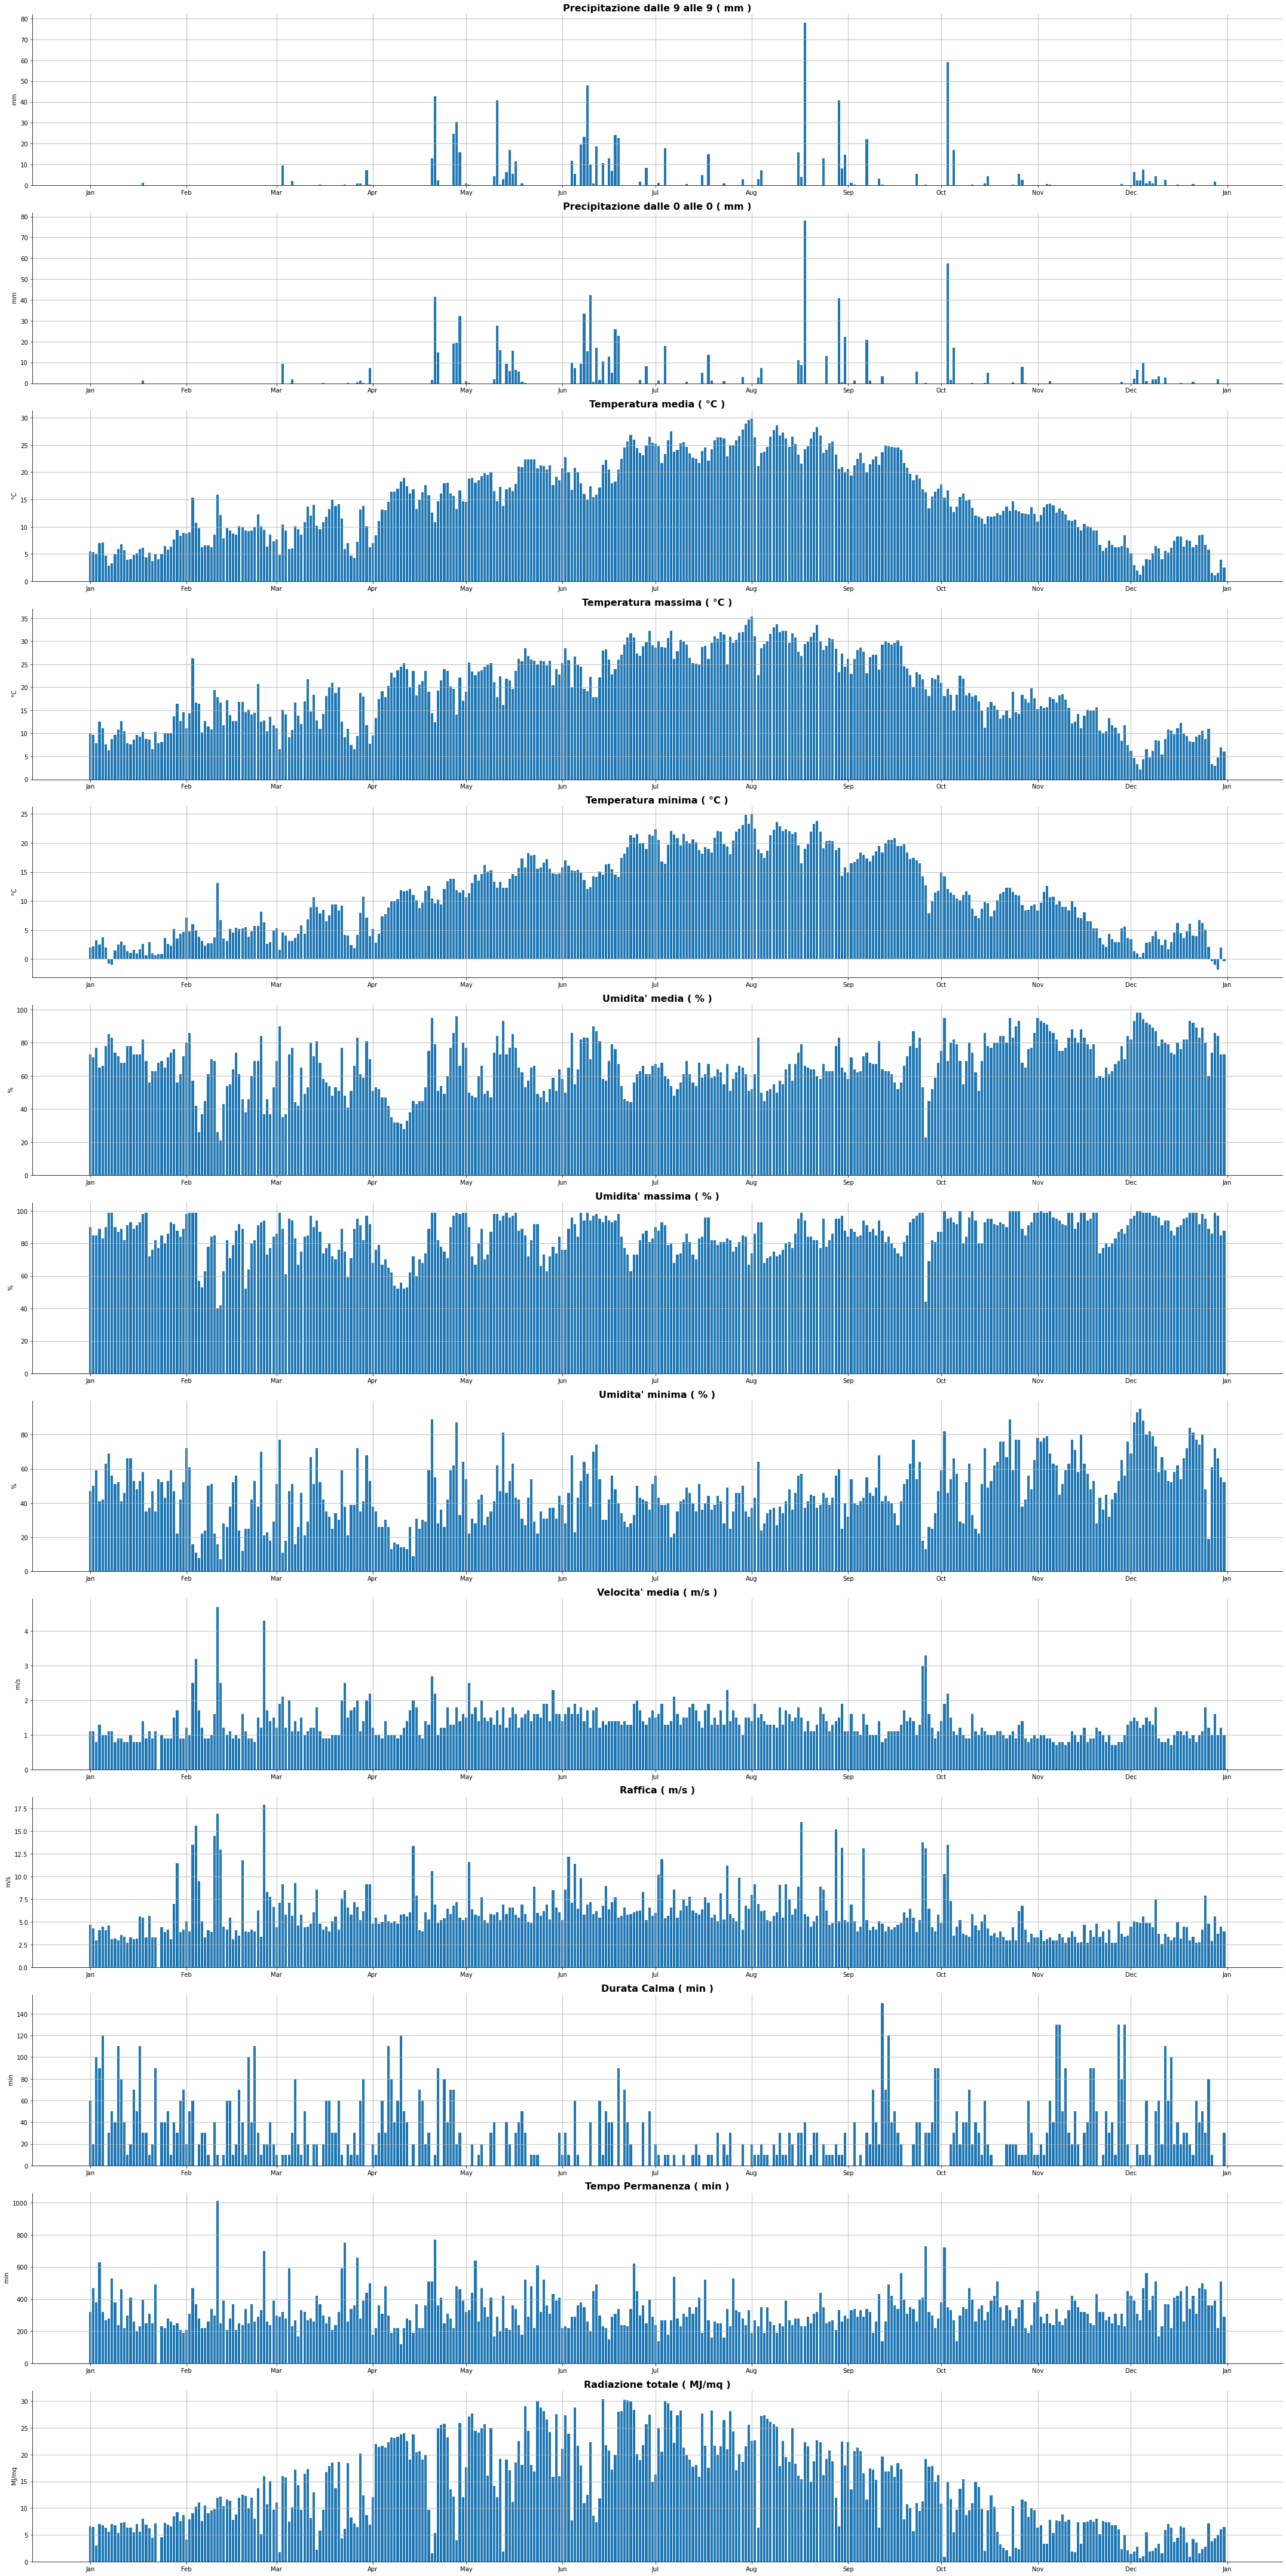

In [5]:
del to_consolata_weather_data_2020['Settore Prevalente']
draw_small_multiple(to_consolata_weather_data_2020)

### Reading Weather data 2021
Provided by: <br>
Arpa Piemonte <br>
Dipartimento Rischi naturali e ambientali <br>
https://aria.ambiente.piemonte.it/

Since we have only the first 6 month at the moment we have to put 0 value for the rest of the year.

In [6]:
# create an array of  dates 
rng = pd.date_range(start='7/1/2021', end='12/31/2021')
last_6_month_2021 = pd.DataFrame({ 'Data': rng, "Precipitazione dalle 9 alle 9 ( mm )": math.nan,	"Precipitazione dalle 0 alle 0 ( mm )": math.nan,	"Temperatura media ( °C )": math.nan,	"Temperatura massima ( °C )": math.nan,	"Temperatura minima ( °C )": math.nan,	"Umidita' media ( % )": math.nan,	"Umidita' massima ( % )": math.nan,	"Umidita' minima ( % )": math.nan,	"Velocita' media ( m/s )": math.nan,	"Raffica ( m/s )": math.nan,	"Durata Calma ( min )": math.nan,	"Tempo Permanenza ( min )": math.nan,	"Radiazione totale ( MJ/mq )": math.nan})                         

### Descriptive Statistics

In [7]:
to_consolata_weather_data_2021_6_month = read_ARPA_csv('data/Weather/TORINO_VIA_DELLA_CONSOLATA_giornalieri_2021.csv')
to_consolata_weather_data_2021_6_month.describe(include=[float])

,Precipitazione dalle 9 alle 9 ( mm ),Precipitazione dalle 0 alle 0 ( mm ),Temperatura media ( °C ),Temperatura massima ( °C ),Temperatura minima ( °C ),Velocita' media ( m/s ),Raffica ( m/s ),Radiazione totale ( MJ/mq )
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,179.000000
mean,2.308287,2.308287,12.687293,16.948619,8.679006,1.418232,6.108287,15.289385
std,8.686170,8.443182,6.932837,7.667657,6.428046,0.472757,2.474557,8.232585
min,0.000000,0.000000,-0.400000,0.500000,-2.400000,0.700000,2.600000,0.700000
25%,0.000000,0.000000,7.600000,10.800000,4.100000,1.100000,4.500000,8.300000
50%,0.000000,0.000000,11.900000,16.400000,7.600000,1.400000,5.500000,15.500000
75%,0.200000,0.200000,17.600000,23.000000,12.600000,1.600000,7.200000,22.200000
max,94.200000,94.200000,27.900000,33.100000,22.600000,4.100000,16.400000,31.400000


### Small multiples

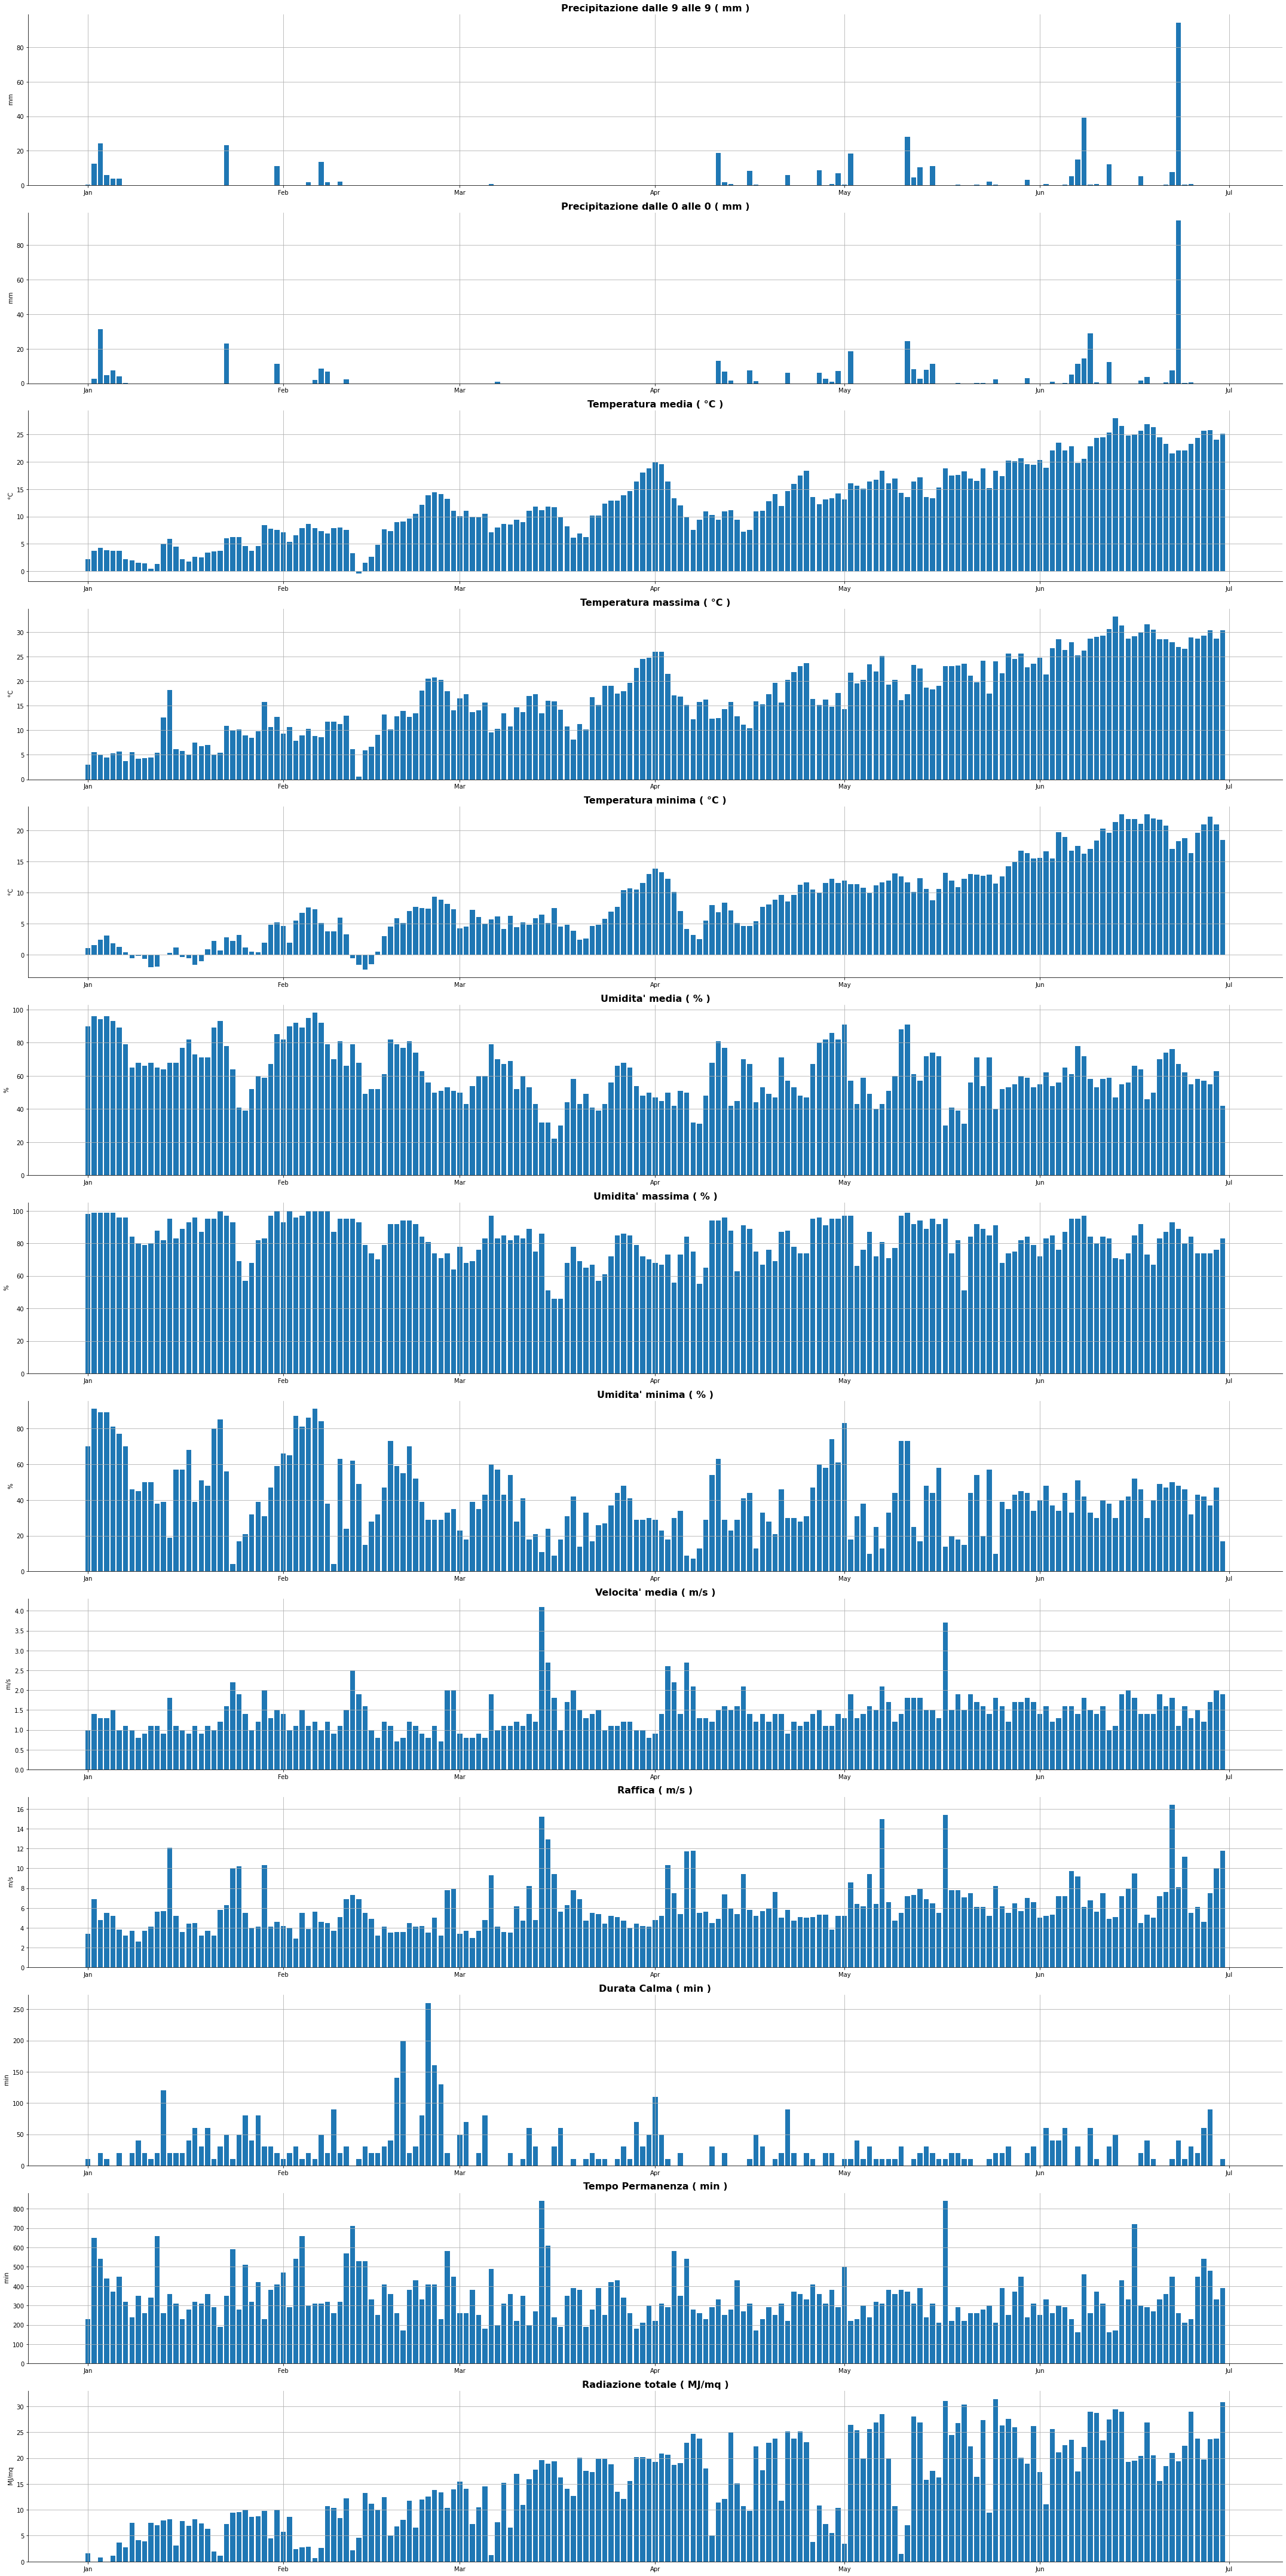

In [8]:
del to_consolata_weather_data_2021_6_month['Settore Prevalente']
to_consolata_weather_data_2021 = pd.concat([to_consolata_weather_data_2021_6_month,last_6_month_2021])
draw_small_multiple(to_consolata_weather_data_2021)

### Reading Weather data 2012-2019
Provided by: <br>
Arpa Piemonte <br>
Dipartimento Rischi naturali e ambientali <br>
https://aria.ambiente.piemonte.it/

In [9]:
def get_average_2012_2019():
    yearly_data = []

    #getting all the dataset
    for x in range(2012, 2020):
        data = read_ARPA_csv('data/Weather/TORINO_VIA_DELLA_CONSOLATA_giornalieri_' + str(x) + '.csv')[['Data','Precipitazione dalle 9 alle 9 ( mm )','Precipitazione dalle 0 alle 0 ( mm )','Temperatura media ( °C )','Temperatura massima ( °C )','Temperatura minima ( °C )',"Umidita' media ( % )","Umidita' massima ( % )","Umidita' minima ( % )","Velocita' media ( m/s )",'Raffica ( m/s )','Durata Calma ( min )','Tempo Permanenza ( min )', 'Radiazione totale ( MJ/mq )']]
        #take only the day of the year
        data['Data']= data['Data'].dt.dayofyear
        yearly_data.append(data)

    #create daily baseline
    avg_daily_baseline=pd.concat([yearly_data[0],yearly_data[1],yearly_data[2],yearly_data[3],yearly_data[4],yearly_data[5],yearly_data[6],yearly_data[7]]).groupby('Data', as_index=True).mean()
    avg_daily_baseline.reset_index(inplace = True)
    
    return avg_daily_baseline

### Descriptive Statistics

In [10]:
to_consolata_weather_data_avg_2012_2019 = get_average_2012_2019()
to_consolata_weather_data_avg_2012_2019.describe(include=[float])

,Precipitazione dalle 9 alle 9 ( mm ),Precipitazione dalle 0 alle 0 ( mm ),Temperatura media ( °C ),Temperatura massima ( °C ),Temperatura minima ( °C ),Umidita' media ( % ),Umidita' massima ( % ),Umidita' minima ( % ),Velocita' media ( m/s ),Raffica ( m/s ),Durata Calma ( min ),Tempo Permanenza ( min ),Radiazione totale ( MJ/mq )
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2.657582,2.657582,14.825132,19.579923,10.743491,65.551230,84.543374,44.591189,1.332123,5.877601,63.598751,352.324226,12.566486
std,3.056227,2.962625,7.494881,8.053109,6.871735,8.206116,5.254609,9.354624,0.205955,1.164613,53.149391,46.802009,6.090730
min,0.000000,0.000000,3.050000,6.525000,0.050000,46.875000,70.375000,25.875000,0.887500,3.450000,3.750000,235.000000,3.300000
25%,0.400000,0.400000,7.203125,11.328125,3.850893,59.375000,81.000000,37.156250,1.162500,5.012500,26.250000,320.312500,6.337054
50%,1.725000,1.787500,14.937500,19.687500,10.881250,64.250000,84.187500,42.687500,1.337500,5.918750,47.500000,348.571429,12.362500
75%,3.743750,3.900000,21.925000,27.434375,17.309375,71.625000,88.250000,50.875000,1.475000,6.696875,78.437500,383.125000,18.093750
max,17.700000,17.450000,27.537500,33.150000,22.712500,85.125000,95.500000,71.125000,1.762500,9.662500,313.750000,488.571429,24.650000


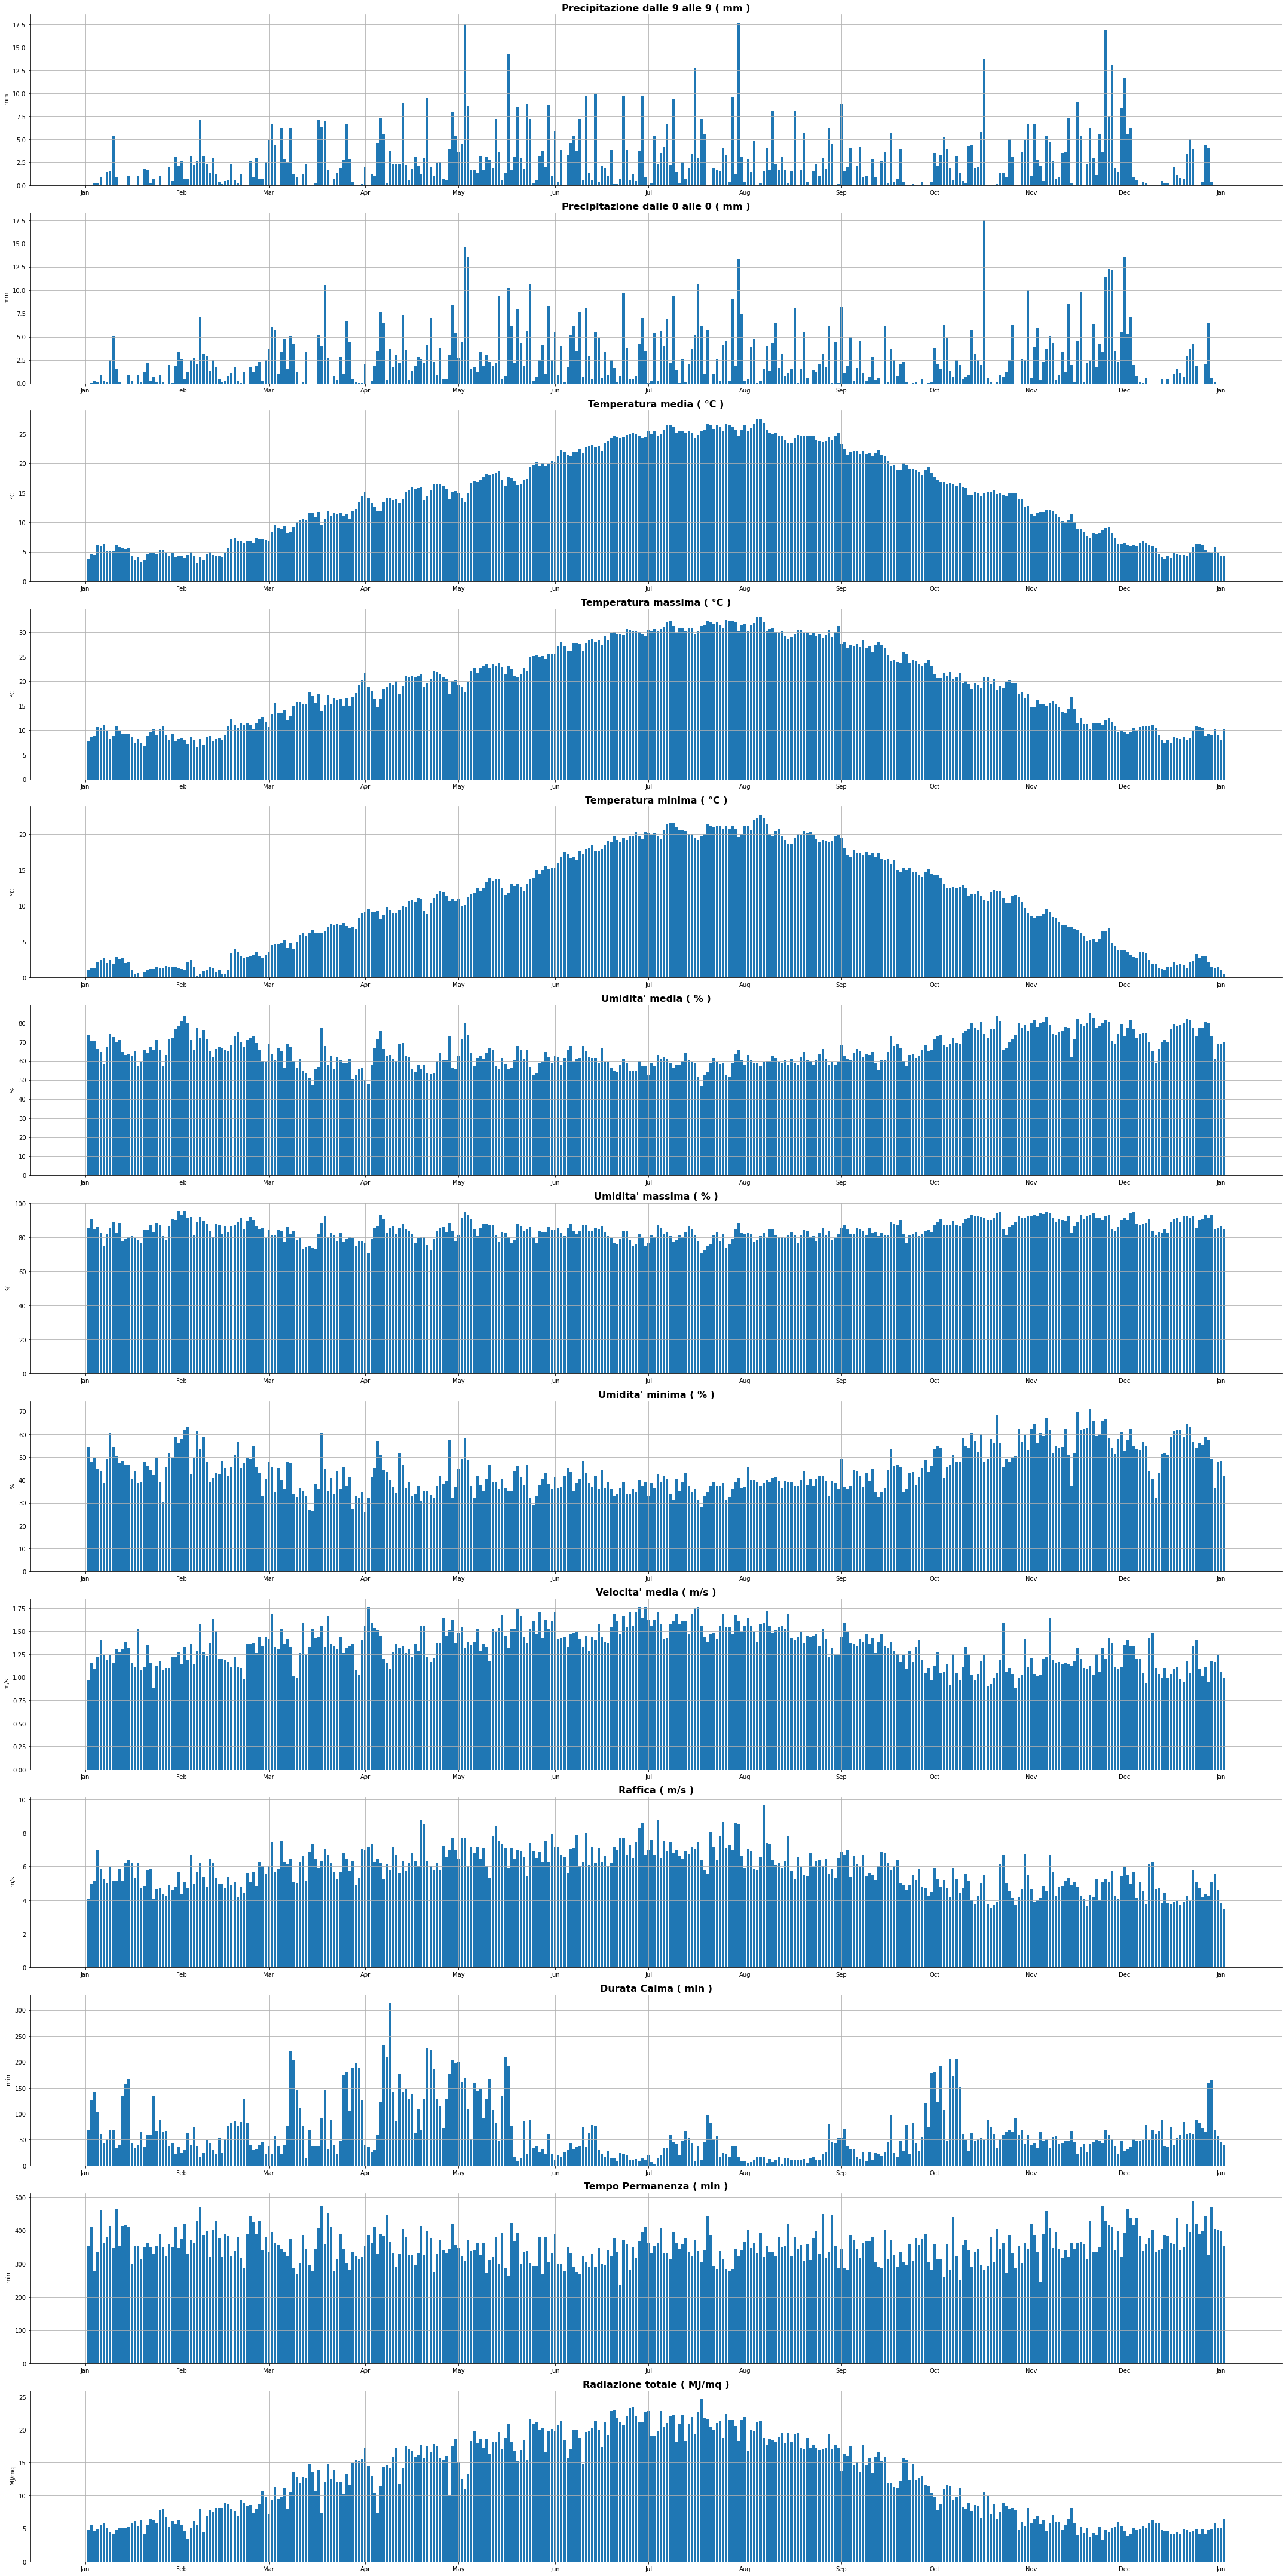

In [11]:
draw_small_multiple(to_consolata_weather_data_avg_2012_2019)

### Average 2012-2019 vs 2020 Comparison

In [12]:
to_rain_consolata_avg_2021_2019 = to_consolata_weather_data_avg_2012_2019[['Data', 'Precipitazione dalle 0 alle 0 ( mm )']].copy()
to_weather_consolata_2020 = to_consolata_weather_data_2020[['Data', 'Precipitazione dalle 0 alle 0 ( mm )']].copy()
to_weather_consolata_2020['Data'] = to_weather_consolata_2020['Data'].dt.dayofyear

to_rain_consolata_avg_2021_2019.rename(columns = {'Precipitazione dalle 0 alle 0 ( mm )':'Precipitation Average 2012-2019 ( mm )'}, inplace = True)
to_weather_consolata_2020.rename(columns = {'Precipitazione dalle 0 alle 0 ( mm )':'Precipitation 2020 ( mm )'}, inplace = True)

#merge data
merged_consolata_avg_2020 = pd.merge(to_rain_consolata_avg_2021_2019 ,to_weather_consolata_2020 ,on=['Data','Data'])
merged_consolata_avg_2020.set_index("Data",inplace=True)

Text(0.5, 0, 'Day of the Year')

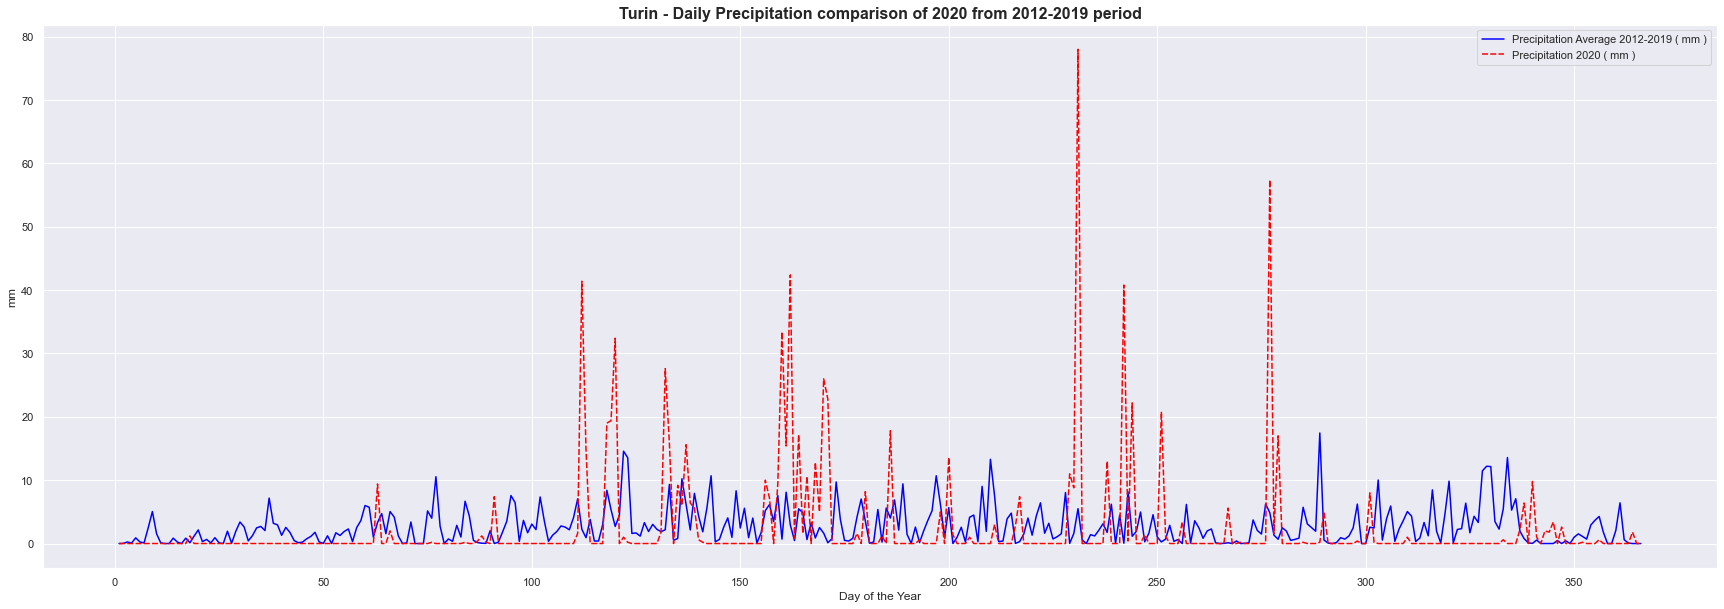

In [13]:
sns.set_theme()
plt.figure(figsize=(30, 10))
palette = ["blue","red"]
sns.lineplot(data=merged_consolata_avg_2020, palette=palette)
plt.title("Turin - Daily Precipitation comparison of 2020 from 2012-2019 period",fontdict= { 'fontsize': 16, 'fontweight':'bold'})
plt.ylabel("mm")
plt.xlabel("Day of the Year")

### Daily Precipitation Variation

In [14]:
def get_precipitation_variation(prec_year):
    avg_prec = get_average_2012_2019()[['Data', 'Precipitazione dalle 0 alle 0 ( mm )']].copy()
    prec_variation = prec_year[['Data', 'Precipitazione dalle 0 alle 0 ( mm )']].copy()
    avg_prec.set_index('Data', inplace=True)
    
    prec_variation['Data Rivelamento'] = prec_variation['Data']
    prec_variation['Data'] = prec_variation['Data'].dt.dayofyear
    prec_variation.set_index('Data', inplace=True)
    prec_variation['Precipitazione dalle 0 alle 0 ( mm )'] = prec_variation['Precipitazione dalle 0 alle 0 ( mm )'] - avg_prec['Precipitazione dalle 0 alle 0 ( mm )']
   
    prec_variation.reset_index(inplace=True)
    prec_variation.drop(columns=['Data'], inplace=True)
    prec_variation.rename(columns = {'Data Rivelamento':'Data', 'Precipitazione dalle 0 alle 0 ( mm )':'Precipitation Variation ( mm )'}, inplace = True)
    prec_variation.set_index('Data', inplace=True)

    return prec_variation
    

Text(0.5, 0, 'Date')

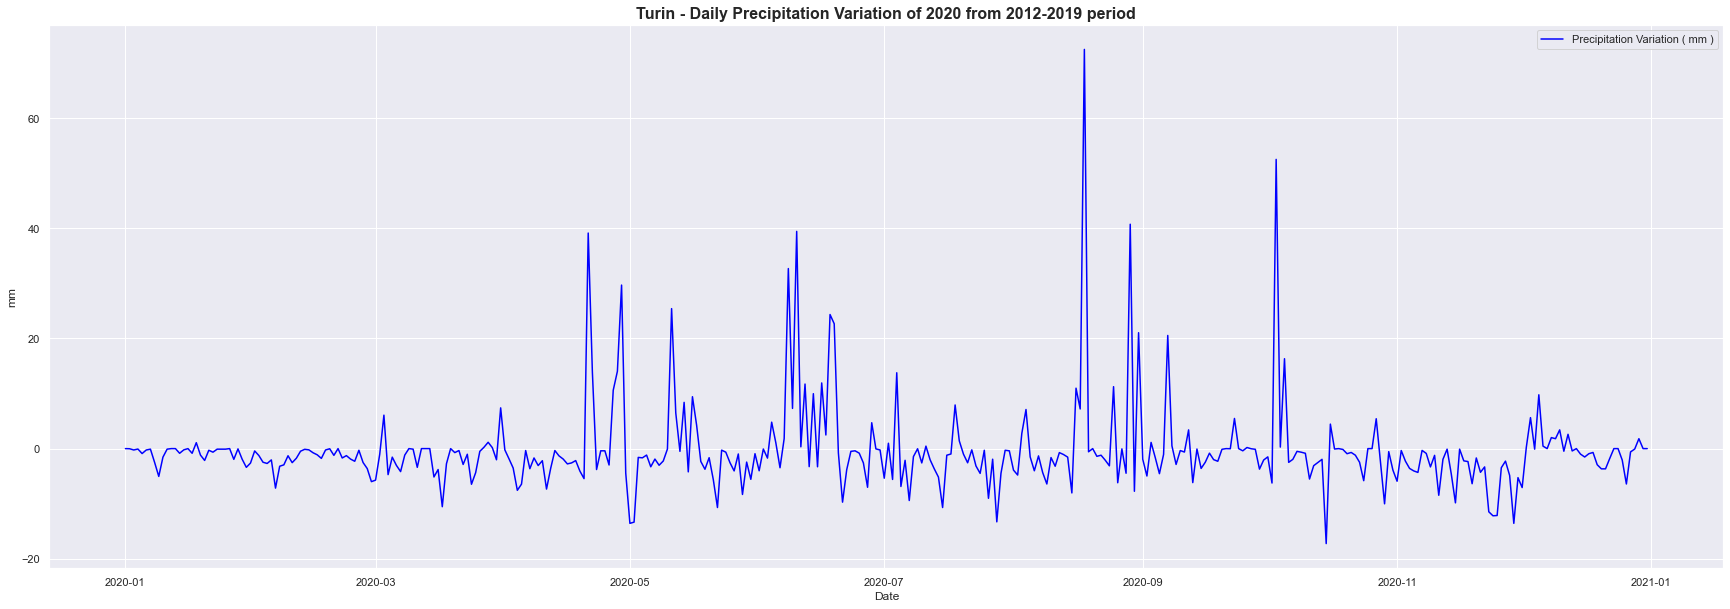

In [15]:
precipitation_var = get_precipitation_variation(to_consolata_weather_data_2020).copy()

sns.set_theme()
plt.figure(figsize=(30, 10))
palette = ["blue"]
sns.lineplot(data=precipitation_var, palette=palette)
plt.title("Turin - Daily Precipitation Variation of 2020 from 2012-2019 period",fontdict= { 'fontsize': 16, 'fontweight':'bold'})
plt.ylabel("mm")
plt.xlabel("Date")

In [16]:
def get_change_from_2012_2019(year):

    avg_daily_baseline = get_average_2012_2019()[['Data',"Velocita' media ( m/s )","Temperatura media ( °C )","Umidita' media ( % )"]].copy()

    #Unpivot a DataFrame from wide to long format
    avg_daily_baseline = avg_daily_baseline.melt(id_vars="Data", value_vars=["Velocita' media ( m/s )",'Temperatura media ( °C )',"Umidita' media ( % )"],
        var_name='type', value_name='value', ignore_index=True)
    avg_daily_baseline.dropna(inplace=True)
    avg_daily_baseline= avg_daily_baseline[avg_daily_baseline['value'] != 0]
    
    #get yearly data
    data_year = read_ARPA_csv('data/Weather/TORINO_VIA_DELLA_CONSOLATA_giornalieri_'+ year +'.csv')[['Data',"Velocita' media ( m/s )","Temperatura media ( °C )","Umidita' media ( % )"]]
    data_year['Giorno']= data_year['Data'].dt.dayofyear

    #Unpivot a DataFrame from wide to long format
    data_year = data_year.melt(id_vars=["Data", "Giorno"], value_vars=["Velocita' media ( m/s )",'Temperatura media ( °C )',"Umidita' media ( % )"],
        var_name='type', value_name='value', ignore_index=True)

    data_year= data_year[data_year['value'] != 0]

    data_year.set_index('Giorno')
    avg_daily_baseline.set_index('Data')

    #calculate percentage deviation
    return_data = data_year
    return_data['value'] = ((data_year['value']-avg_daily_baseline['value'])/avg_daily_baseline['value'])*100

    #resetting index
    return_data.set_index('Data')

    #remove useless column
    del return_data['Giorno']

    #transform data from long to wide again
    return_data = return_data.pivot(index='Data', columns='type', values='value')
    return_data.reset_index(inplace=True)

    #rename column
    return_data= return_data.rename(columns = {"Velocita' media ( m/s )":'Wind ( % )','Temperatura media ( °C )':'Average Temperature ( % )',"Umidita' media ( % )":'Average Humidity ( % )'})

    return return_data

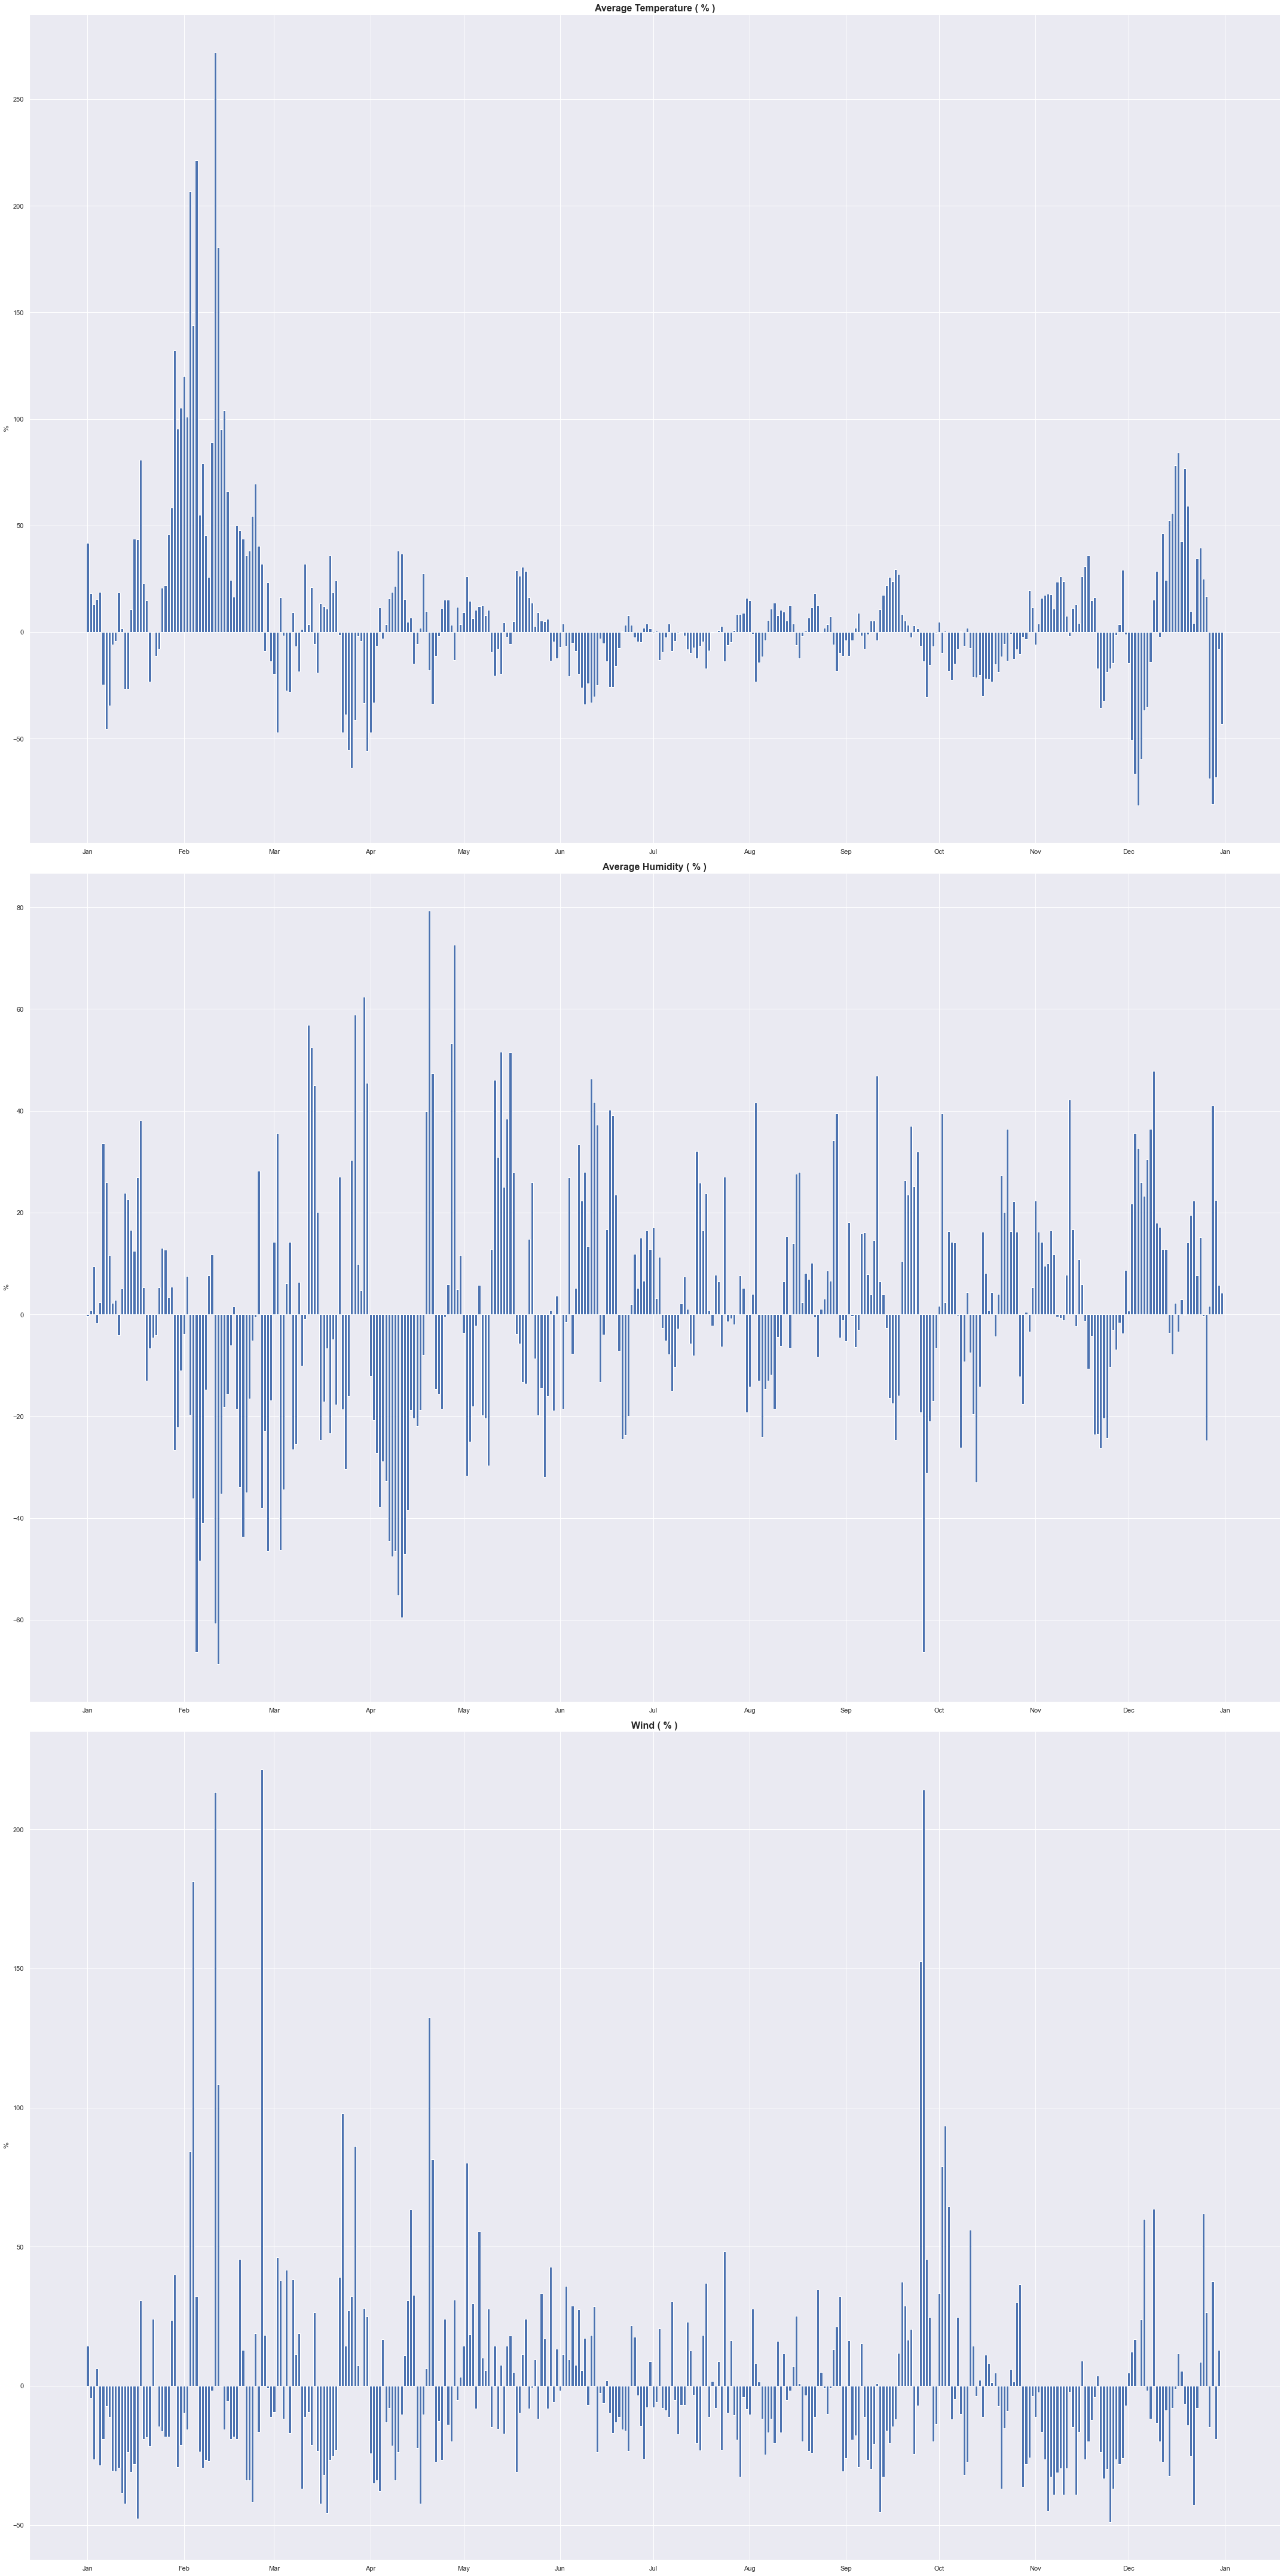

In [17]:
draw_small_multiple(get_change_from_2012_2019('2020'))

### Average 2012-2019 vs 2021 Comparison

In [18]:
to_rain_consolata_avg_2021_2019 = to_consolata_weather_data_avg_2012_2019[['Data', 'Precipitazione dalle 0 alle 0 ( mm )']].copy()
to_weather_consolata_2021 = to_consolata_weather_data_2021[['Data', 'Precipitazione dalle 0 alle 0 ( mm )']].copy()
to_weather_consolata_2021['Data'] = to_weather_consolata_2021['Data'].dt.dayofyear

to_rain_consolata_avg_2021_2019.rename(columns = {'Precipitazione dalle 0 alle 0 ( mm )':'Precipitation Average 2012-2019 ( mm )'}, inplace = True)
to_weather_consolata_2021.rename(columns = {'Precipitazione dalle 0 alle 0 ( mm )':'Precipitation 2020 ( mm )'}, inplace = True)

#merge data
merged_consolata_avg_2021 = pd.merge(to_rain_consolata_avg_2021_2019 ,to_weather_consolata_2021 ,on=['Data','Data'])
merged_consolata_avg_2021.set_index("Data",inplace=True)

Text(0.5, 0, 'Day of the Year')

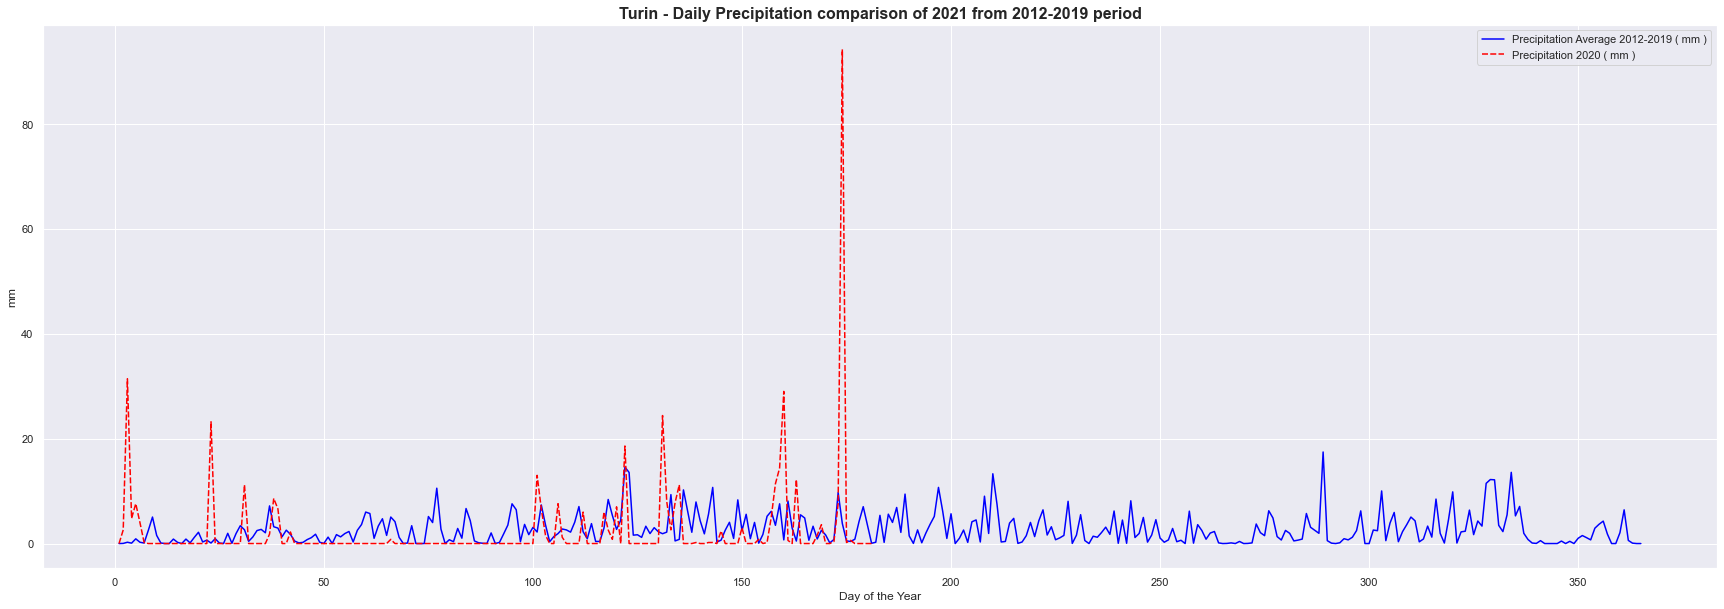

In [19]:
sns.set_theme()
plt.figure(figsize=(30, 10))
palette = ["blue","red"]
sns.lineplot(data=merged_consolata_avg_2021, palette=palette)
plt.title("Turin - Daily Precipitation comparison of 2021 from 2012-2019 period",fontdict= { 'fontsize': 16, 'fontweight':'bold'})
plt.ylabel("mm")
plt.xlabel("Day of the Year")

### Daily Precipitation Variation

Text(0.5, 0, 'Date')

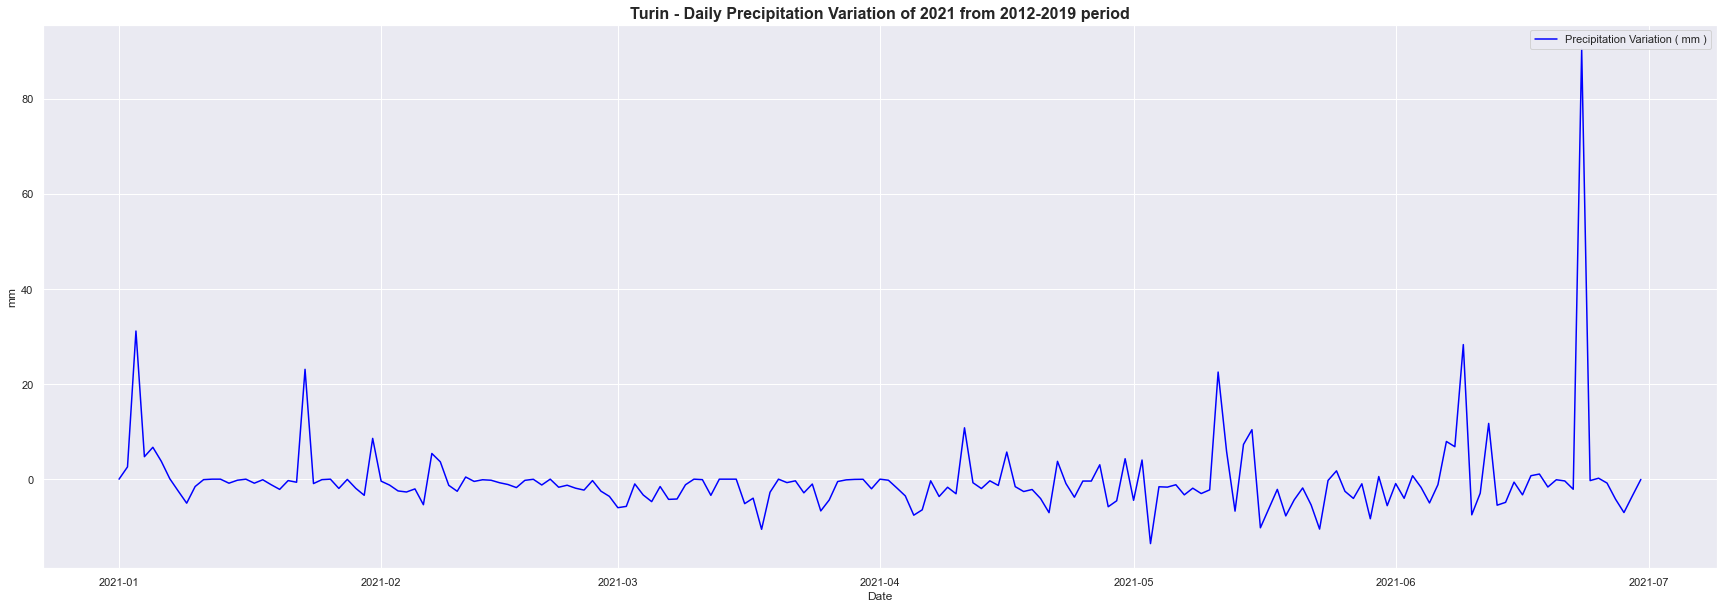

In [20]:
precipitation_var = get_precipitation_variation(to_consolata_weather_data_2021).copy()

sns.set_theme()
plt.figure(figsize=(30, 10))
palette = ["blue"]
sns.lineplot(data=precipitation_var, palette=palette)
plt.title("Turin - Daily Precipitation Variation of 2021 from 2012-2019 period",fontdict= { 'fontsize': 16, 'fontweight':'bold'})
plt.ylabel("mm")
plt.xlabel("Date")

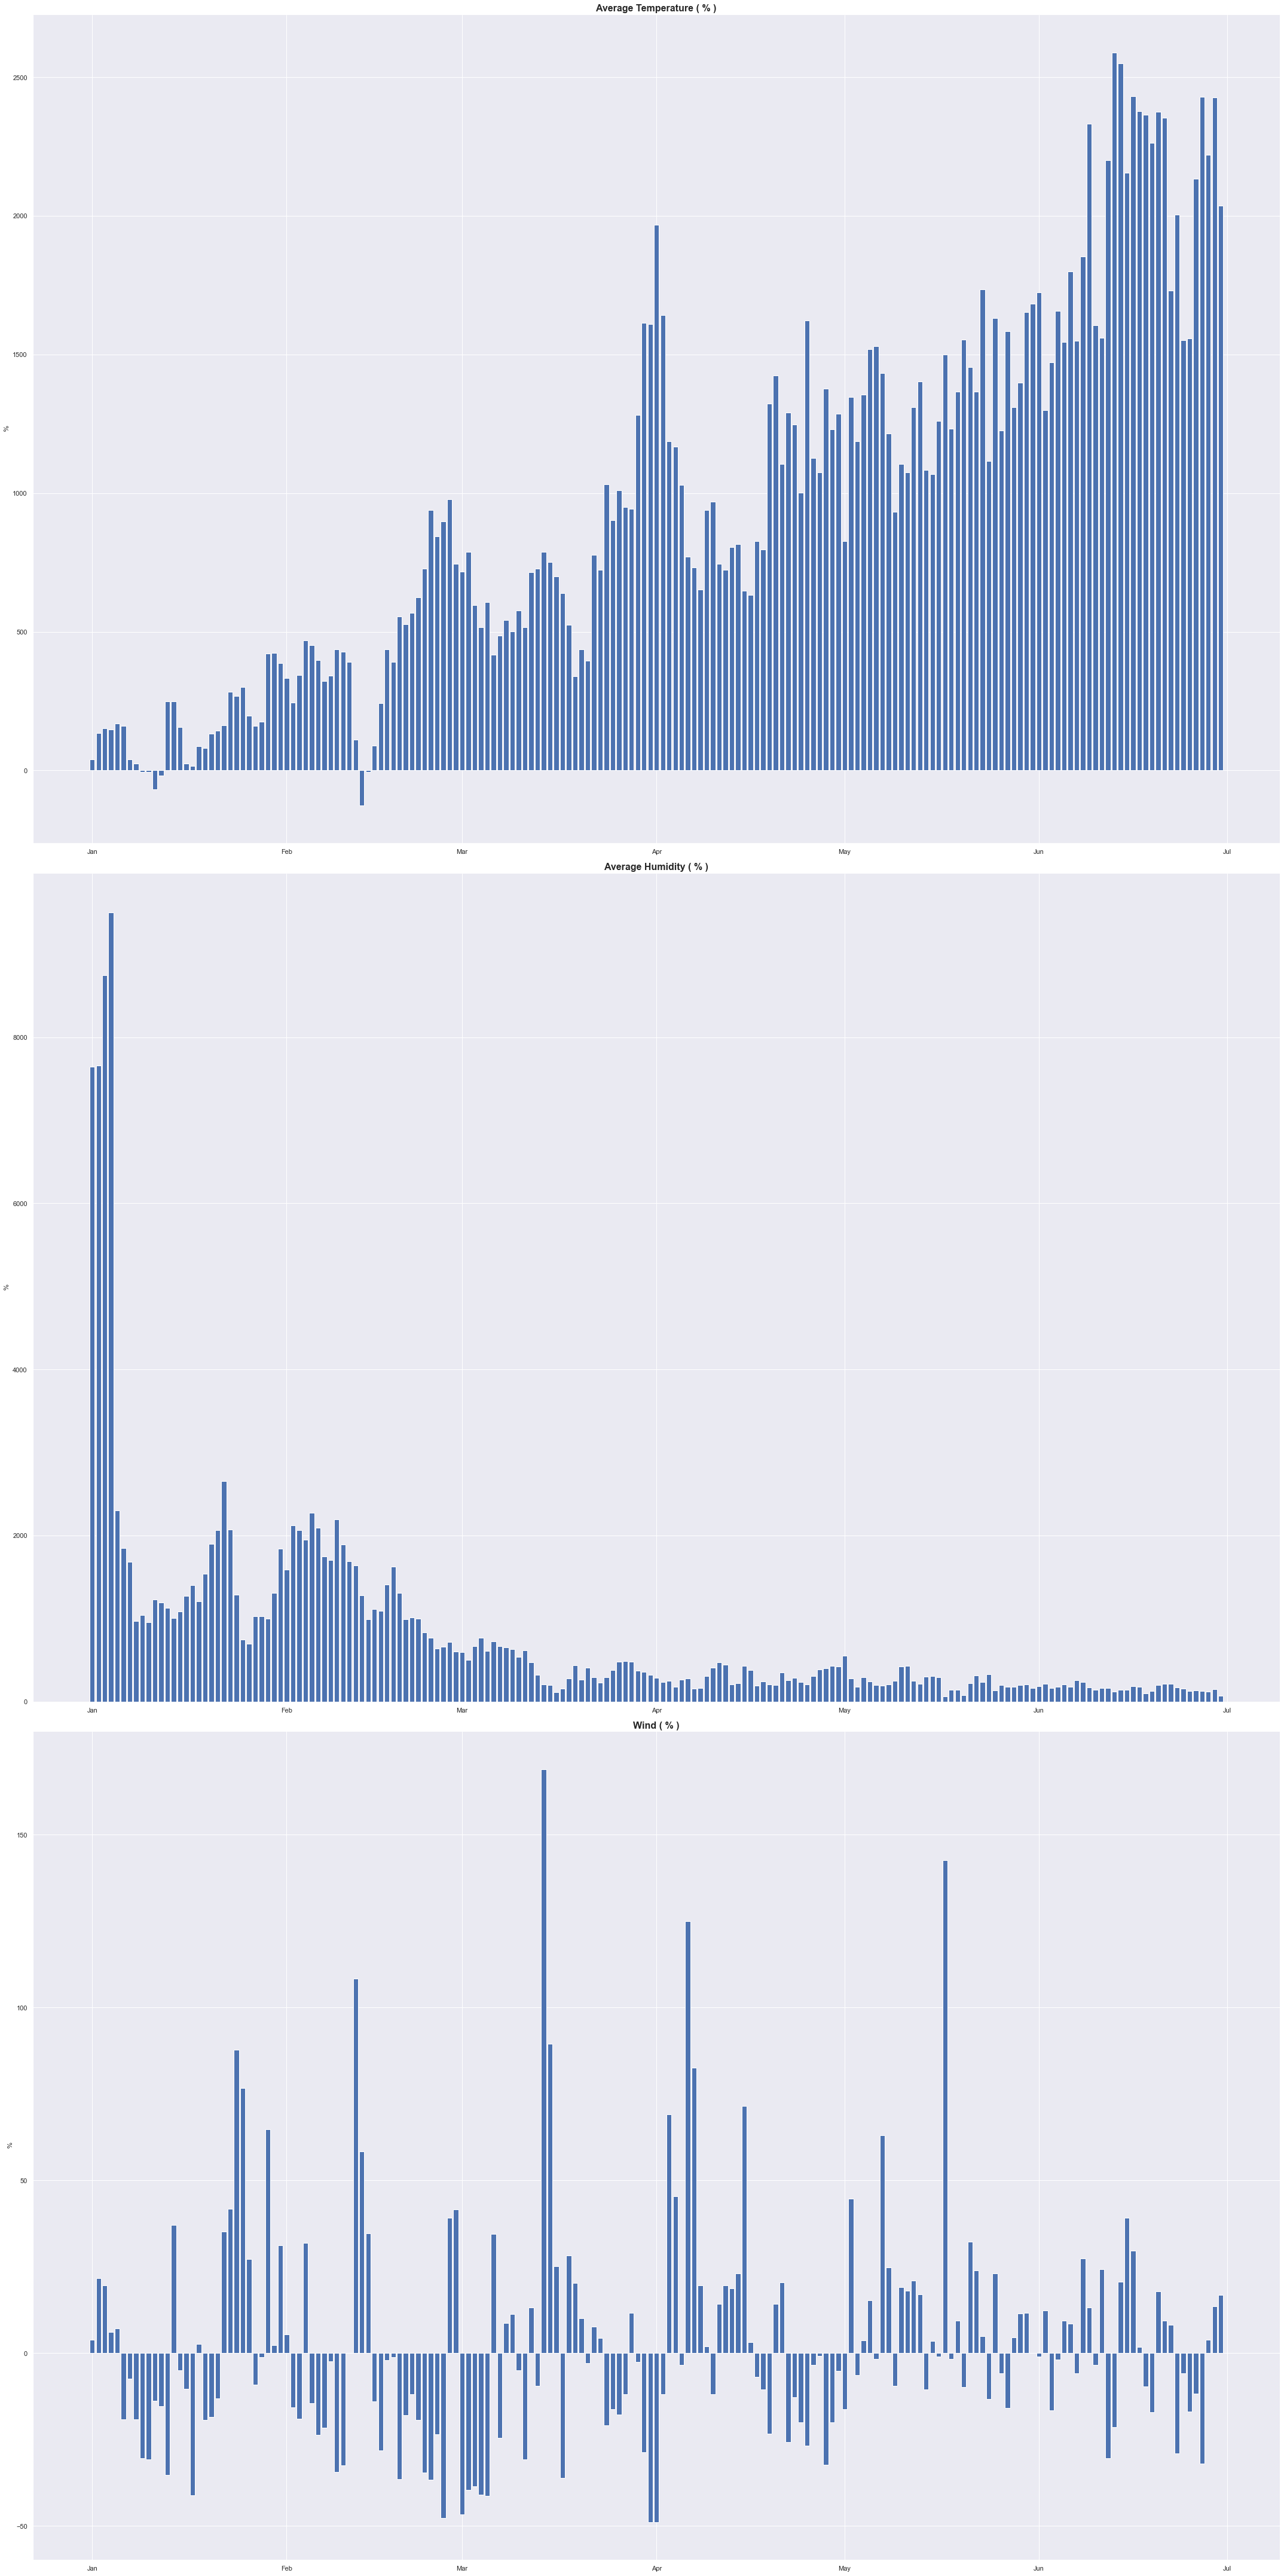

In [21]:
draw_small_multiple(get_change_from_2012_2019('2021'))